In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols 


In [86]:
# Import as Dataframe
df_tc = pd.read_csv('Data_mexico.csv')
df_tc.head()

,year_tc,temperature_change
0,1961,-0.140
1,1962,0.189
2,1963,0.229
3,1964,-0.292
4,1965,-0.073


In [87]:
df_tc.rename(columns={'year_tc':'year'}, inplace=True)
df_tc

,year,temperature_change
0,1961,-0.140
1,1962,0.189
2,1963,0.229
3,1964,-0.292
4,1965,-0.073
5,1966,-0.252
6,1967,-0.108
7,1968,-0.421
8,1969,0.178
9,1970,-0.299


In [88]:
df_co2 = pd.read_csv('panel data mexico.csv')
df_co2.head()

,country,iso_3,year_co2,total,coal,oil,gas,cement,flaring,other,per capita
0,Mexico,MEX,1961,65.239903,3.576064,44.971936,8.035152,1.500959,7.155792,NaN,1.742551
1,Mexico,MEX,1962,63.743714,3.718746,42.225173,11.848695,1.657138,4.293961,NaN,1.647836
2,Mexico,MEX,1963,66.292194,4.077807,42.774836,11.658204,1.860651,5.920697,NaN,1.658046
3,Mexico,MEX,1964,74.200126,4.235375,46.449899,13.453544,2.184097,7.877211,NaN,1.795141
4,Mexico,MEX,1965,75.167897,4.070506,47.296271,15.765424,2.125953,5.909744,NaN,1.758807


In [89]:
df_co2.rename(columns={'year_co2':'year'}, inplace=True)
df_co2.head()

,country,iso_3,year,total,coal,oil,gas,cement,flaring,other,per capita
0,Mexico,MEX,1961,65.239903,3.576064,44.971936,8.035152,1.500959,7.155792,NaN,1.742551
1,Mexico,MEX,1962,63.743714,3.718746,42.225173,11.848695,1.657138,4.293961,NaN,1.647836
2,Mexico,MEX,1963,66.292194,4.077807,42.774836,11.658204,1.860651,5.920697,NaN,1.658046
3,Mexico,MEX,1964,74.200126,4.235375,46.449899,13.453544,2.184097,7.877211,NaN,1.795141
4,Mexico,MEX,1965,75.167897,4.070506,47.296271,15.765424,2.125953,5.909744,NaN,1.758807


In [90]:
#We merge the two dataframe
df= pd.merge(df_co2, df_tc, how='inner', on='year')
df.head()

,country,iso_3,year,total,coal,oil,gas,cement,flaring,other,per capita,temperature_change
0,Mexico,MEX,1961,65.239903,3.576064,44.971936,8.035152,1.500959,7.155792,NaN,1.742551,-0.140
1,Mexico,MEX,1962,63.743714,3.718746,42.225173,11.848695,1.657138,4.293961,NaN,1.647836,0.189
2,Mexico,MEX,1963,66.292194,4.077807,42.774836,11.658204,1.860651,5.920697,NaN,1.658046,0.229
3,Mexico,MEX,1964,74.200126,4.235375,46.449899,13.453544,2.184097,7.877211,NaN,1.795141,-0.292
4,Mexico,MEX,1965,75.167897,4.070506,47.296271,15.765424,2.125953,5.909744,NaN,1.758807,-0.073


In [91]:
#We check the general information
print("General information")

pd.DataFrame({"type": df.dtypes, 
"unique values": df.nunique(), "null values(%)": round(df.isnull().sum()/df.shape[0]*100, 2)}).rename_axis(axis='rows')      

General information


,type,unique values,null values(%)
country,object,1,0.0
iso_3,object,1,0.0
year,int64,59,0.0
total,float64,59,0.0
coal,float64,59,0.0
oil,float64,59,0.0
gas,float64,59,0.0
cement,float64,59,0.0
flaring,float64,59,0.0
other,float64,0,100.0


In [92]:
#Delete the rows
df=df.drop('other', axis=1)
df

,country,iso_3,year,total,coal,oil,gas,cement,flaring,per capita,temperature_change
0,Mexico,MEX,1961,65.239903,3.576064,44.971936,8.035152,1.500959,7.155792,1.742551,-0.140
1,Mexico,MEX,1962,63.743714,3.718746,42.225173,11.848695,1.657138,4.293961,1.647836,0.189
2,Mexico,MEX,1963,66.292194,4.077807,42.774836,11.658204,1.860651,5.920697,1.658046,0.229
3,Mexico,MEX,1964,74.200126,4.235375,46.449899,13.453544,2.184097,7.877211,1.795141,-0.292
4,Mexico,MEX,1965,75.167897,4.070506,47.296271,15.765424,2.125953,5.909744,1.758807,-0.073
5,Mexico,MEX,1966,80.844570,4.433440,50.303056,17.011952,2.434970,6.661152,1.829873,-0.252
6,Mexico,MEX,1967,90.005531,5.015812,56.606496,19.814106,2.765578,5.803540,1.971343,-0.108
7,Mexico,MEX,1968,93.887231,5.814768,59.411760,19.825904,3.027359,5.807440,1.990387,-0.421
8,Mexico,MEX,1969,102.176189,6.206593,66.902242,19.594370,3.354324,6.118661,2.097454,0.178
9,Mexico,MEX,1970,113.950680,6.767408,73.408240,20.610000,3.550696,9.614336,2.265903,-0.299


In [93]:
#We select only the info from 'coal','oil','gas','cement', 'flaring', 'per capita'
df_num=df.loc[:,['coal','oil','gas','cement', 'flaring', 'per capita','temperature_change']]
df_num.head()

,coal,oil,gas,cement,flaring,per capita,temperature_change
0,3.576064,44.971936,8.035152,1.500959,7.155792,1.742551,-0.140
1,3.718746,42.225173,11.848695,1.657138,4.293961,1.647836,0.189
2,4.077807,42.774836,11.658204,1.860651,5.920697,1.658046,0.229
3,4.235375,46.449899,13.453544,2.184097,7.877211,1.795141,-0.292
4,4.070506,47.296271,15.765424,2.125953,5.909744,1.758807,-0.073


In [94]:
#Check the null values
null=df_num.columns[df_num.isnull().any()].tolist()
null

[]

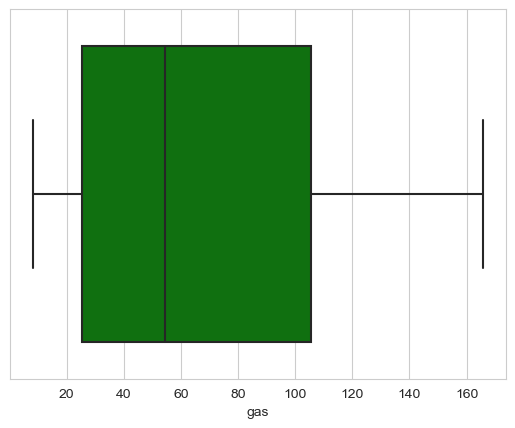

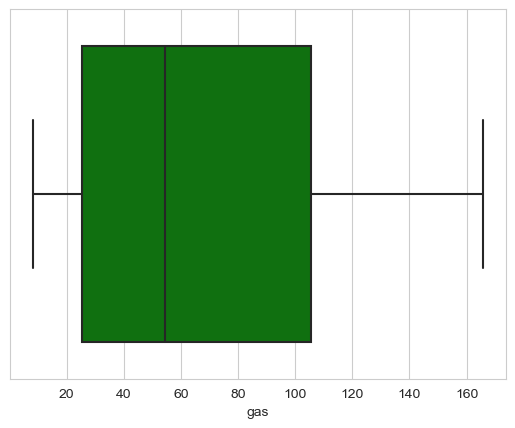

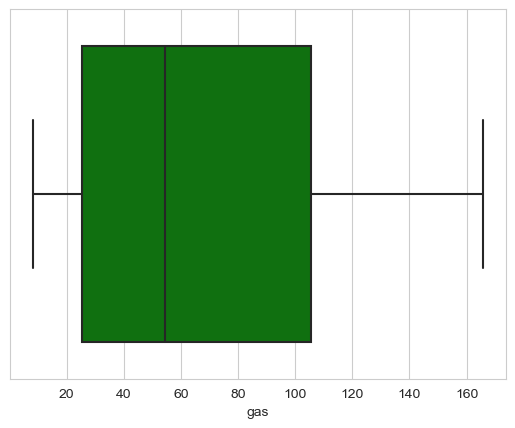

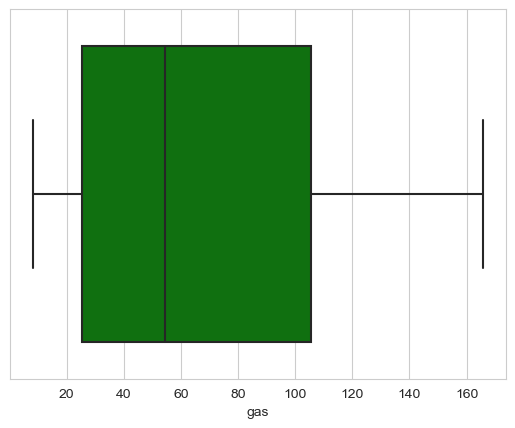

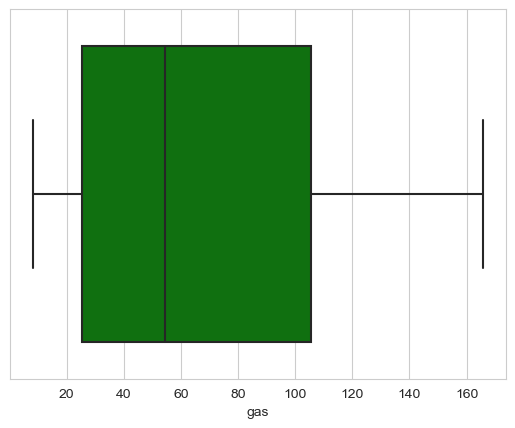

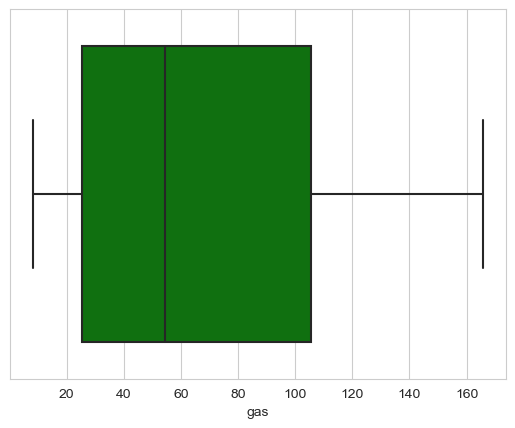

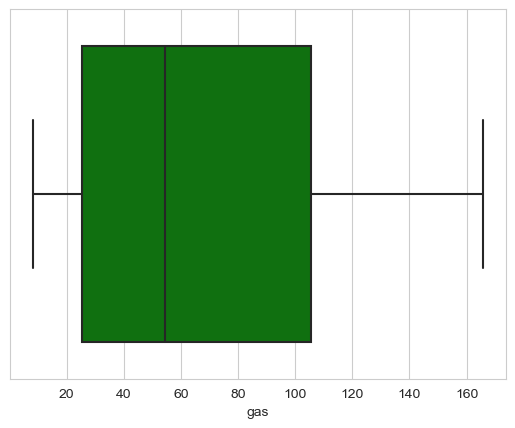

In [95]:
#Boxplot para ver si hay outliers


for i in df_num:
  sns.boxplot(x=df['gas'], color='green')
  plt.show()

C:\Users\karla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


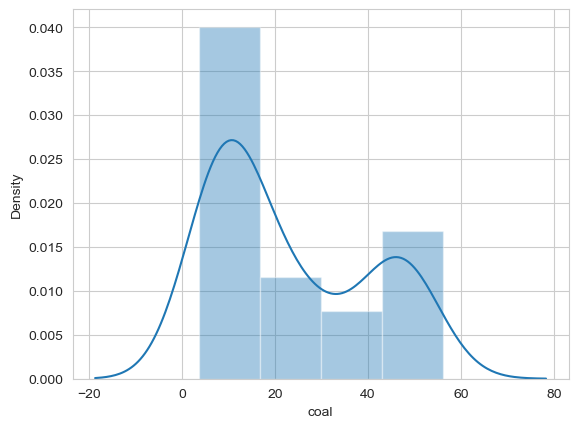

C:\Users\karla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


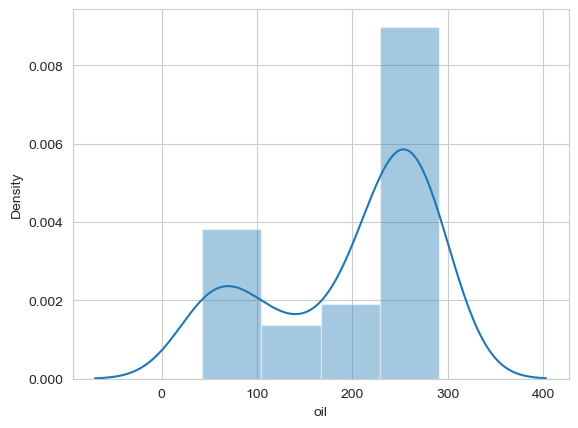

C:\Users\karla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


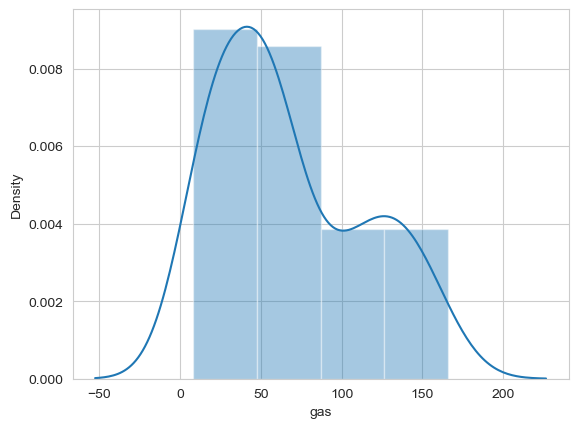

C:\Users\karla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


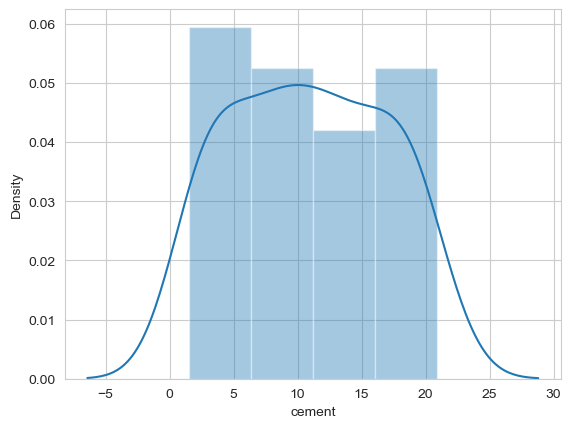

C:\Users\karla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


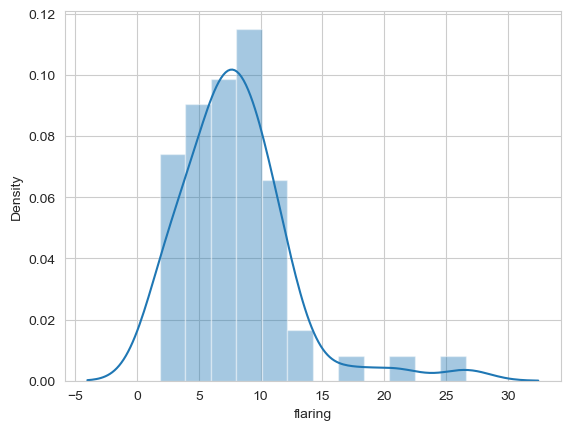

C:\Users\karla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


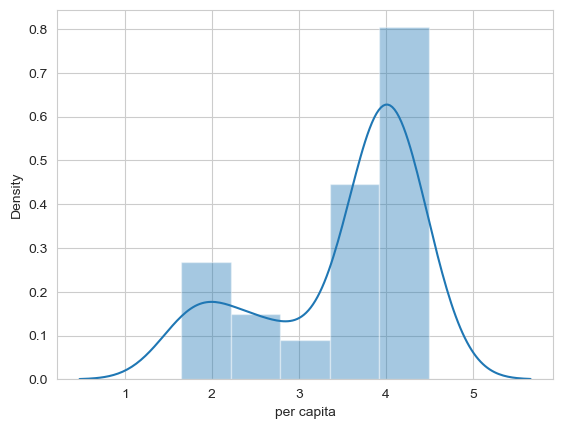

C:\Users\karla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


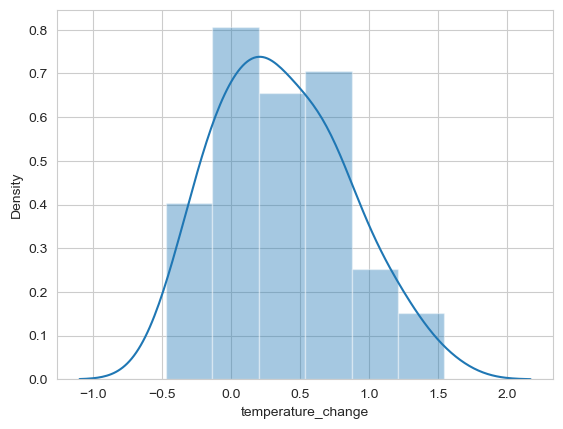

In [96]:
#Check Normal distribution 
sns.set_style('whitegrid')

for i in df_num:
  sns.distplot(df_num[i])
  plt.show()

In [97]:
corr_matrix=df_num.corr()
corr_matrix

,coal,oil,gas,cement,flaring,per capita,temperature_change
coal,1.000000,0.763765,0.960069,0.934788,0.189710,0.687095,0.812777
oil,0.763765,1.000000,0.783579,0.901230,0.088578,0.973119,0.702907
gas,0.960069,0.783579,1.000000,0.961966,0.198157,0.716085,0.852012
cement,0.934788,0.901230,0.961966,1.000000,0.169729,0.835260,0.849288
flaring,0.189710,0.088578,0.198157,0.169729,1.000000,0.165174,0.120760
per capita,0.687095,0.973119,0.716085,0.835260,0.165174,1.000000,0.621023
temperature_change,0.812777,0.702907,0.852012,0.849288,0.120760,0.621023,1.000000


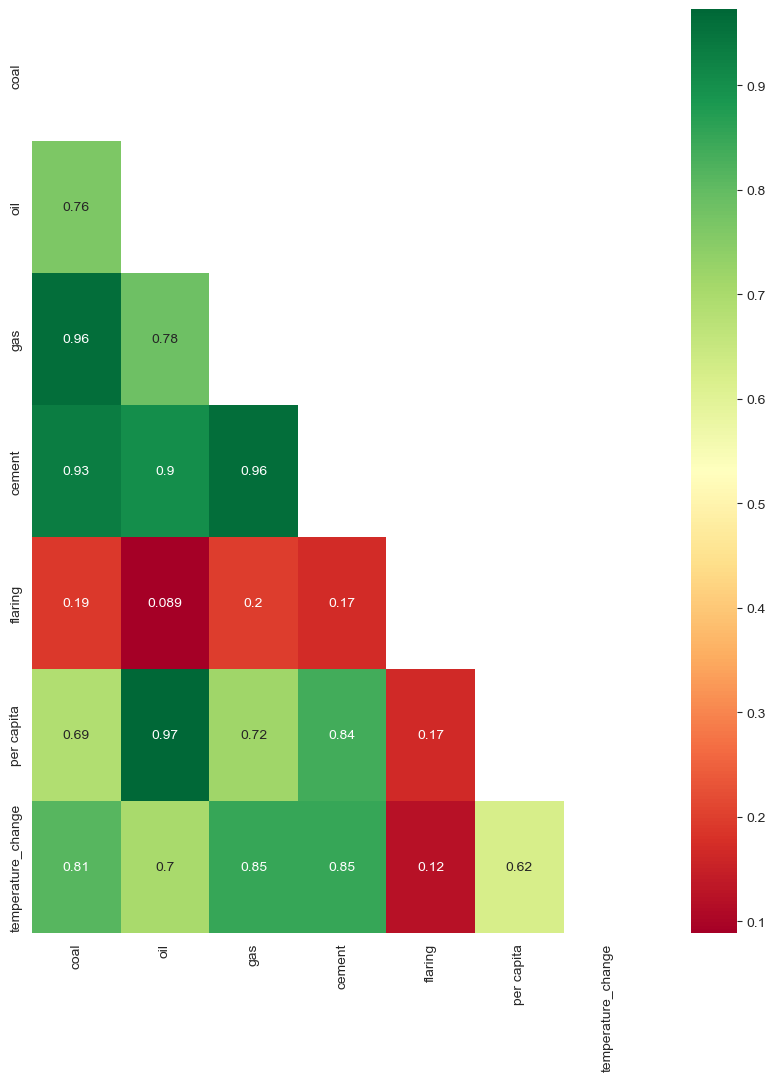

In [98]:
mascara=np.zeros_like(corr_matrix)
mascara[np.triu_indices_from(mascara) ]=True 

fig , ax=plt.subplots(figsize=(10,12))
ax= sns.heatmap(corr_matrix, mask=mascara, annot=True, cmap='RdYlGn')

In [99]:
#Identificamos que hay una alta correlación entre varias variables independientes con la dependiente 
# y entre ellas mismas por lo que decidimos elegir las que no presenten alta correlación entre ellas por la multicolinealidad
# df_num=['coal','oil','gas','cement', 'flaring', 'per capita','temperature_change']
#se eligen primero 'coal','oil','gas','flaring', 'per capita' r2=0.316
#se eligen primero 'coal','oil','flaring' r2=0.13
# ['coal', 'per capita', 'flaring'] r2=0.20
# ['per capita', 'flaring'] r2=0.03
# ['oil','gas','flaring'] r2=.41
# ['oil','flaring'] r2=-0.13
# ['gas','flaring'] r2=0.41
# ['coal','oil','gas','cement'] r2=0.43 x_stan
# ['cement','gas','oil'] r2=0.46 x_stan
#['coal','gas','oil'] r2=0.48 x_stan
# ['gas','oil'] r2=0.502 x_stan
# ['oil','gas', 'per capita'] r2=0.505 x_norm

In [100]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [101]:
X_num=df_num[['oil','gas', 'per capita']]
y=df['temperature_change']

C:\Users\karla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

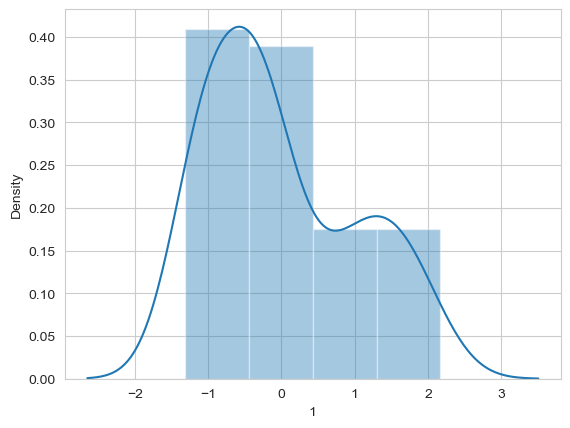

In [102]:
transformer=StandardScaler().fit(X_num)
x_stan=transformer.transform(X_num)
x_stan_df=pd.DataFrame(x_stan)

sns.distplot(x_stan_df[1])

C:\Users\karla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

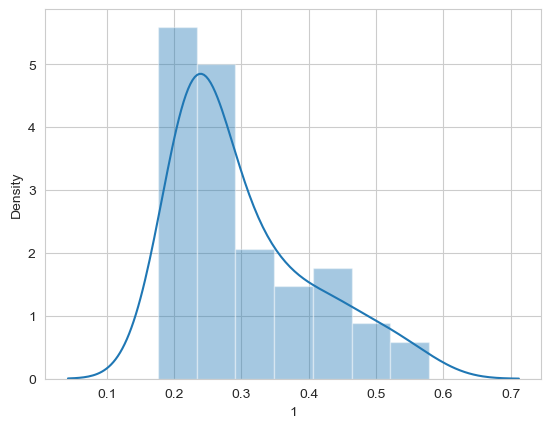

In [103]:
transformer=Normalizer().fit(X_num)
x_norm=transformer.transform(X_num)

x_norm_df=pd.DataFrame(x_norm)

sns.distplot(x_norm_df[1])

In [104]:
X=x_norm

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [106]:
from sklearn import linear_model
lm=linear_model.LinearRegression()

In [107]:
model=lm.fit(X_train, y_train)

In [108]:
from sklearn.metrics import mean_squared_error, r2_score
predictions=lm.predict(X_test)
r2_score(y_test,predictions)

0.5052812955879665

In [109]:
predictions_train=lm.predict(X_train)
r2_score(y_train,predictions_train)

0.7369417687974508

Text(0, 0.5, 'Cambio de temperatura (°C)')

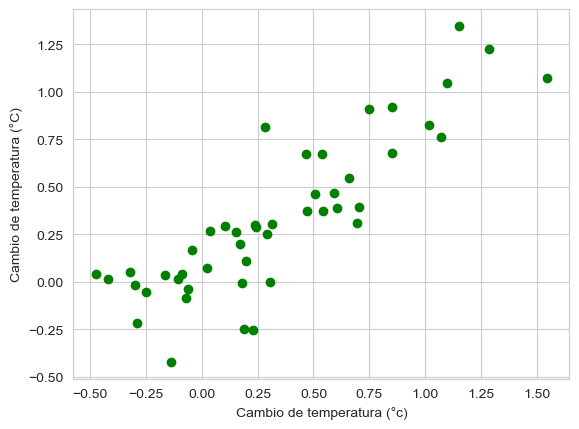

In [110]:
plt.plot(y_train,predictions_train, 'o', c='green')
plt.xlabel("Cambio de temperatura (°c)")
plt.ylabel("Cambio de temperatura (°C)")


Text(0, 0.5, 'Cambio de temperatura (°C)')

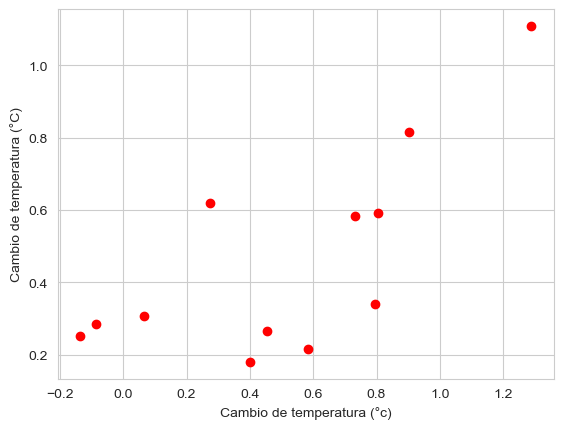

In [111]:
plt.plot(y_test,predictions, 'o', c='red')
plt.xlabel("Cambio de temperatura (°c)")
plt.ylabel("Cambio de temperatura (°C)")